In [1]:
#Importing the data set from csv file
import pandas as pds
LWatchData = pds.read_csv('Luxury_watch1.csv')
#Display the first 5 rows for quick view
LWatchData.head(5)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"


In [2]:
#display the dimension of data (rows and columns) - 13 features and 1 target variable
LWatchData.shape

(507, 14)

In [3]:
#Check for columns containing Null Values
Check_Nil = [var for var in LWatchData.columns if LWatchData[var].isnull().mean()>0 and LWatchData[var].dtypes == 'O']
Check_Nil

['Complications', 'Power Reserve', 'Price (USD)']

In [4]:
#check for null values and count occurance for each feature
LWatchData.isnull().sum()

Brand                    0
Model                    0
Case Material            0
Strap Material           0
Movement Type            0
Water Resistance         0
Case Diameter (mm)       0
Case Thickness (mm)      0
Band Width (mm)          0
Dial Color               0
Crystal Material         0
Complications          122
Power Reserve           14
Price (USD)              1
dtype: int64

In [5]:
#replacing complications column where null with standard
#watches may or may not have any complications which will affect the price
LWatchData = LWatchData.fillna({'Complications':'Standard'})

In [6]:
#analyze values in columns for data cleaning process
#Standard should be listed with count of Null identified earlier (122)
LWatchData['Complications'].value_counts()

Complications
Date                               234
Standard                           122
Chronograph                         78
Chronograph, Date                   10
Date, Chronograph                    9
Chronograph, Tachymeter              7
GMT, Date                            5
Date, Power Reserve Indicator        4
Date, Moonphase                      4
Date, Power Reserve                  4
Date, GMT                            4
GMT                                  4
Date, Moon Phase                     2
Date, World Time                     2
Date, Second Time Zone               2
Date, Stopwatch                      2
Date, Unidirectional Bezel           1
Date, Cyclops                        1
Dual Time Zone                       1
Date, Chronograph, Moon Phase        1
Date, Sub Seconds                    1
Date, Cyclops Lens                   1
Date, Rotating Bezel                 1
Chronograph, Moon Phase              1
Day/Date                             1
Power Reser

In [7]:
#Unify data values where applicable
#in this case we have some common data with different representation ("Date,Chronograph" , "Date,GMT" )
LWatchData['Complications'].replace({'Chronograph, Date':'Date, Chronograph',
  "GMT, Date":"Date, GMT",
  "Date, Moon Phase":"Date, Moonphase"}, inplace = True)

In [8]:
#analyze values in columns for data cleaning process
LWatchData['Complications'].value_counts()

Complications
Date                               234
Standard                           122
Chronograph                         78
Date, Chronograph                   19
Date, GMT                            9
Chronograph, Tachymeter              7
Date, Moonphase                      6
Date, Power Reserve Indicator        4
GMT                                  4
Date, Power Reserve                  4
Date, Second Time Zone               2
Date, World Time                     2
Date, Stopwatch                      2
Date, Chronograph, Moon Phase        1
Dual Time Zone                       1
Date, Sub Seconds                    1
Date, Cyclops Lens                   1
Date, Cyclops                        1
Date, Power Reserve, Moon Phase      1
Date, Rotating Bezel                 1
Chronograph, Moon Phase              1
Day/Date                             1
Power Reserve                        1
Date, Chronograph, Flyback           1
Date, Unidirectional Bezel           1
World Time,

In [9]:
#check for null values and count occurance for each feature
LWatchData.isnull().sum()

Brand                   0
Model                   0
Case Material           0
Strap Material          0
Movement Type           0
Water Resistance        0
Case Diameter (mm)      0
Case Thickness (mm)     0
Band Width (mm)         0
Dial Color              0
Crystal Material        0
Complications           0
Power Reserve          14
Price (USD)             1
dtype: int64

In [10]:
#Drop null power reserve row - 14 rows found
LWatchData.dropna(subset = ["Power Reserve"], inplace = True)

In [11]:
#check for null values and count occurance for each feature
LWatchData.isnull().sum()

Brand                  0
Model                  0
Case Material          0
Strap Material         0
Movement Type          0
Water Resistance       0
Case Diameter (mm)     0
Case Thickness (mm)    0
Band Width (mm)        0
Dial Color             0
Crystal Material       0
Complications          0
Power Reserve          0
Price (USD)            1
dtype: int64

In [12]:
#Drop null price row - one row found
LWatchData.dropna(subset = ["Price (USD)"], inplace = True)

In [13]:
#check for null values and count occurance for each feature
LWatchData.isnull().sum()

Brand                  0
Model                  0
Case Material          0
Strap Material         0
Movement Type          0
Water Resistance       0
Case Diameter (mm)     0
Case Thickness (mm)    0
Band Width (mm)        0
Dial Color             0
Crystal Material       0
Complications          0
Power Reserve          0
Price (USD)            0
dtype: int64

In [14]:
#Perform descriptive analysis on the data
LWatchData.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm)
count,492.000000,492.000000,492.000000
mean,41.181911,11.670610,21.153455
std,2.202308,2.424666,1.596626
min,33.000000,5.150000,16.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.235000,20.000000
75%,42.000000,13.320000,22.000000
max,46.500000,16.950000,28.000000


In [15]:
#Convert datatype of some features to enable further analysis
#check data types of the data available
LWatchData.dtypes

Brand                   object
Model                   object
Case Material           object
Strap Material          object
Movement Type           object
Water Resistance        object
Case Diameter (mm)     float64
Case Thickness (mm)    float64
Band Width (mm)        float64
Dial Color              object
Crystal Material        object
Complications           object
Power Reserve           object
Price (USD)             object
dtype: object

In [16]:
#Convert Price to integer and remove strings in middle
LWatchData['Price (USD)'] = LWatchData['Price (USD)'].str.replace(',','').astype(int)

In [17]:
#Convert Water Resistance to integer and remove strings attached
LWatchData['Water Resistance'] = LWatchData['Water Resistance'].str.replace(' meters','').astype(int)

In [18]:
#Perform descriptive analysis on the data
LWatchData.describe()

,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Price (USD)
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,122.764228,41.181911,11.670610,21.153455,12317.540650
std,150.011817,2.202308,2.424666,1.596626,10458.175524
min,30.000000,33.000000,5.150000,16.000000,495.000000
25%,50.000000,40.000000,9.800000,20.000000,5800.000000
50%,100.000000,41.000000,12.235000,20.000000,8500.000000
75%,120.000000,42.000000,13.320000,22.000000,17000.000000
max,2000.000000,46.500000,16.950000,28.000000,70000.000000


In [19]:
#Check water resistance watch which is unreasonable (in this case 2KM)
LWatchData[LWatchData['Water Resistance']==2000].count()

Brand                  1
Model                  1
Case Material          1
Strap Material         1
Movement Type          1
Water Resistance       1
Case Diameter (mm)     1
Case Thickness (mm)    1
Band Width (mm)        1
Dial Color             1
Crystal Material       1
Complications          1
Power Reserve          1
Price (USD)            1
dtype: int64

In [20]:
#Check the outlier record
LWatchData[LWatchData['Water Resistance']==2000]

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
175,Breitling,Superocean,Stainless Steel,Rubber,Automatic,2000,42.0,13.32,20.0,Blue,Sapphire,Date,38 hours,3600


In [21]:
#We decided to eliminate the record for further cleaning since it is only one record
LWatchData.drop(175)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,9500
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,5800
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,4200
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,7900
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30,42.9,9.20,20.0,Black,Sapphire,Standard,45 hours,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30,38.5,8.25,20.0,White,Sapphire,Date,38 hours,21500
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,13500
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,1800
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,19000


In [22]:
#perform descriptive analysis where values are not numerical
LWatchData.describe(include = 'object')

,Brand,Model,Case Material,Strap Material,Movement Type,Dial Color,Crystal Material,Complications,Power Reserve
count,492,492,492,492,492,492,492,492,492
unique,37,89,16,14,3,7,4,27,24
top,IWC,Royal Oak,Stainless Steel,Leather,Automatic,Black,Sapphire,Date,60 hours
freq,39,38,392,216,441,213,475,232,82


<Axes: xlabel='Water Resistance', ylabel='Price (USD)'>

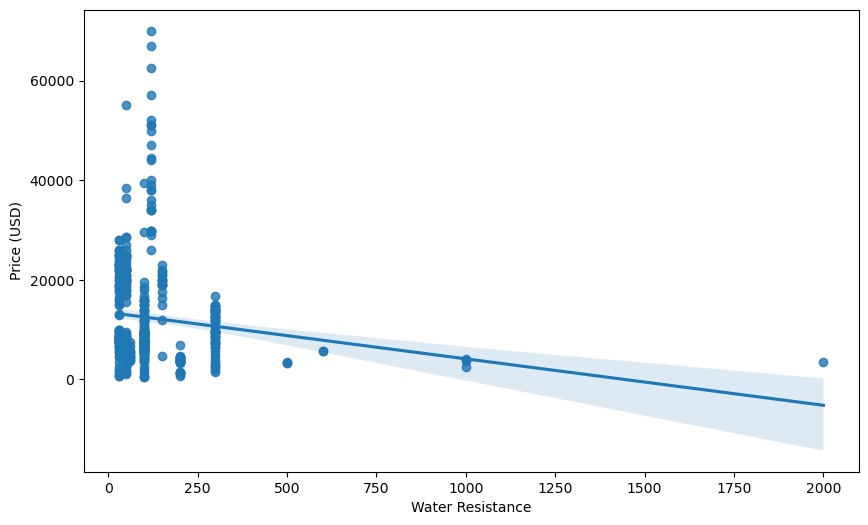

In [23]:
#in order to find the correlation between object type features and target variable we make use of plots
#First attempt with "Water Resistance"
#visualize the trending line for understanding the slope
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="Water Resistance", y="Price (USD)", data=LWatchData)

In [24]:
#check for correlation and P value for Decision making n features to be used for price prediction
from scipy import stats
print("Water Resistance Correlation")
pearson_coef1, p_value1 = stats.pearsonr(LWatchData['Water Resistance'], LWatchData['Price (USD)'])
print("The pearson correlation coefficient is ",pearson_coef1," with a P_Value of P = ", p_value1)


Water Resistance Correlation
The pearson correlation coefficient is  -0.13376508588641897  with a P_Value of P =  0.002950227403960411


Case Diameter (mm)
The pearson correlation coefficient is  -0.13830699131616067  with a P_Value of P =  0.0021065519811841434


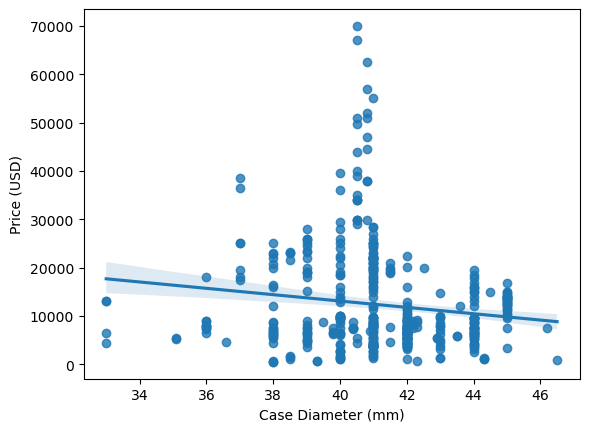

In [25]:
sns.regplot(x="Case Diameter (mm)", y="Price (USD)", data=LWatchData)
#check for correlation and P value for Decision making n features to be used for price prediction
from scipy import stats
print("Case Diameter (mm)")
pearson_coef1, p_value1 = stats.pearsonr(LWatchData['Case Diameter (mm)'], LWatchData['Price (USD)'])
print("The pearson correlation coefficient is ",pearson_coef1," with a P_Value of P = ", p_value1)


Case Thickness (mm)
The pearson correlation coefficient is  -0.45162693614161503  with a P_Value of P =  4.23241756358719e-26


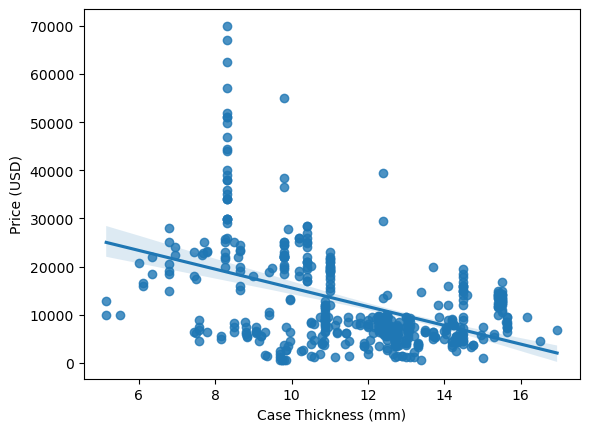

In [26]:
sns.regplot(x="Case Thickness (mm)", y="Price (USD)", data=LWatchData)
#in order to find the correlation between object type features and target variable we make use of plots
from scipy import stats
print("Case Thickness (mm)")
pearson_coef1, p_value1 = stats.pearsonr(LWatchData['Case Thickness (mm)'], LWatchData['Price (USD)'])
print("The pearson correlation coefficient is ",pearson_coef1," with a P_Value of P = ", p_value1)


Band Width (mm)
The pearson correlation coefficient is  -0.11496077575224758  with a P_Value of P =  0.01071271234251337


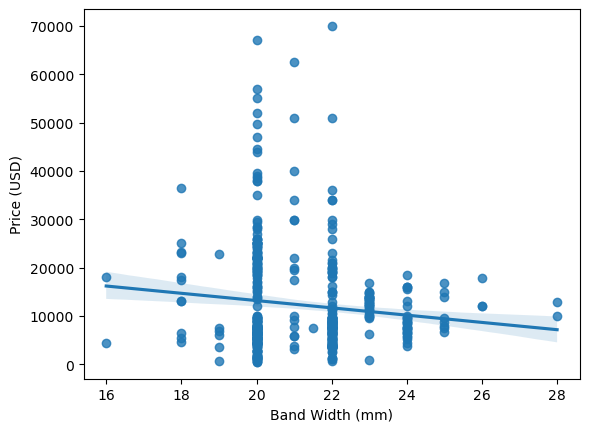

In [27]:
sns.regplot(x="Band Width (mm)", y="Price (USD)", data=LWatchData)
#in order to find the correlation between object type features and target variable we make use of plots
from scipy import stats
print("Band Width (mm)")
pearson_coef1, p_value1 = stats.pearsonr(LWatchData['Band Width (mm)'], LWatchData['Price (USD)'])
print("The pearson correlation coefficient is ",pearson_coef1," with a P_Value of P = ", p_value1)


<Axes: xlabel='Brand', ylabel='Price (USD)'>

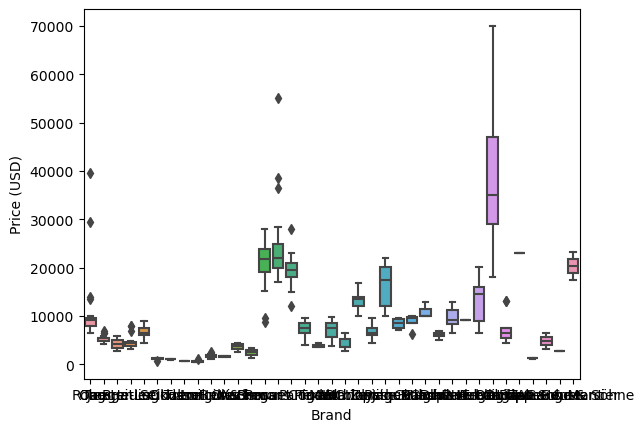

In [28]:
#making use of box plot to spot the correlation
sns.boxplot(x="Brand", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Model', ylabel='Price (USD)'>

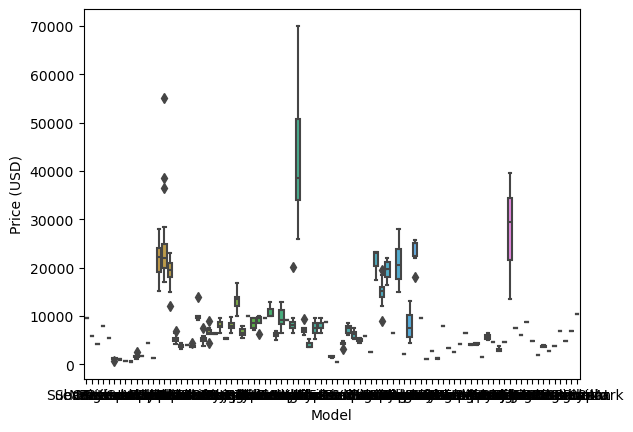

In [29]:
#making use of box plot to spot the correlation
sns.boxplot(x="Model", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Case Material', ylabel='Price (USD)'>

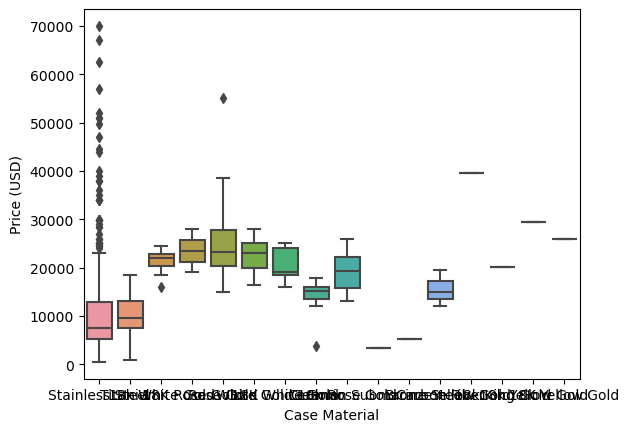

In [30]:
#making use of box plot to spot the correlation
sns.boxplot(x="Case Material", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Strap Material', ylabel='Price (USD)'>

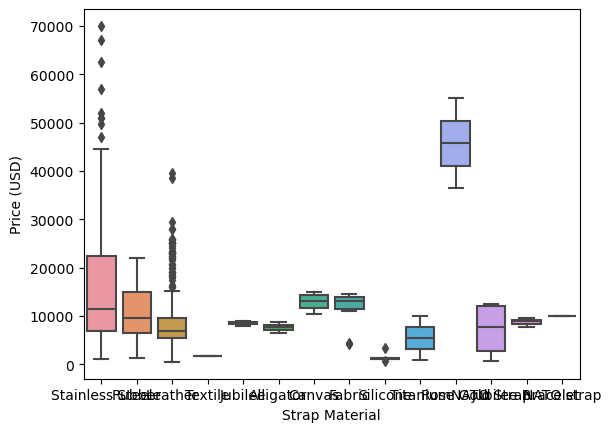

In [31]:
#making use of box plot to spot the correlation
sns.boxplot(x="Strap Material", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Movement Type', ylabel='Price (USD)'>

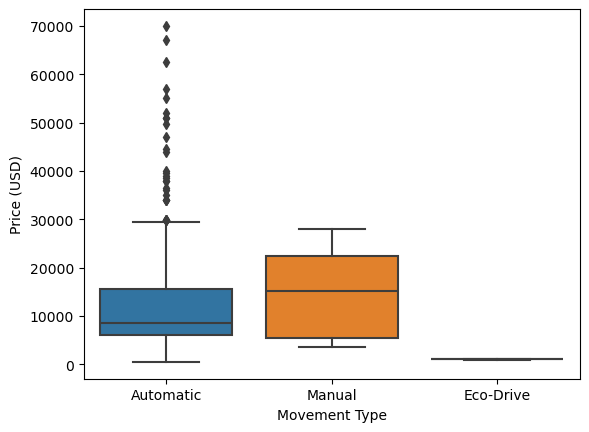

In [32]:
#making use of box plot to spot the correlation
sns.boxplot(x="Movement Type", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Dial Color', ylabel='Price (USD)'>

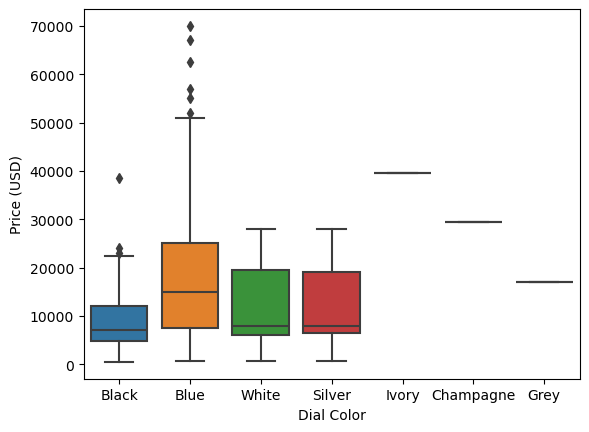

In [33]:
#making use of box plot to spot the correlation
sns.boxplot(x="Dial Color", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Crystal Material', ylabel='Price (USD)'>

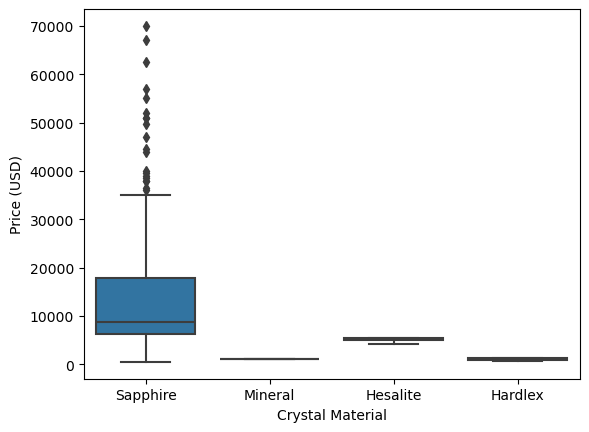

In [34]:
#making use of box plot to spot the correlation
sns.boxplot(x="Crystal Material", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Complications', ylabel='Price (USD)'>

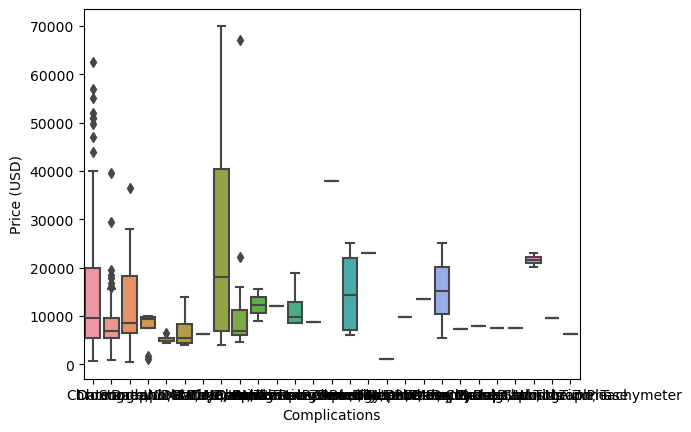

In [35]:
#making use of box plot to spot the correlation
sns.boxplot(x="Complications", y="Price (USD)", data=LWatchData)

<Axes: xlabel='Power Reserve', ylabel='Price (USD)'>

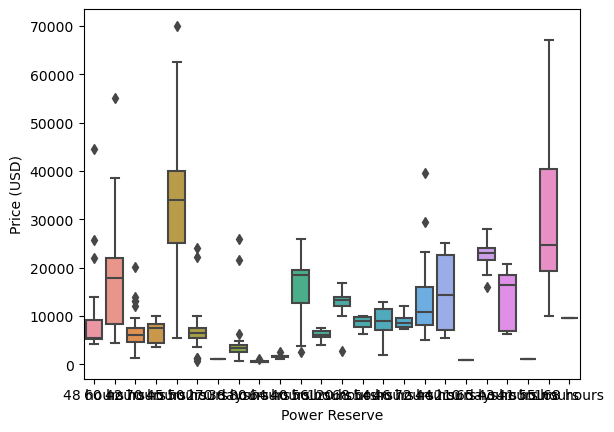

In [36]:
#making use of box plot to spot the correlation
sns.boxplot(x="Power Reserve", y="Price (USD)", data=LWatchData)

In [37]:
#check outlier in Power Reserve field to transform and apply regression analysis
LWatchData['Power Reserve'].value_counts()

Power Reserve
60 hours     82
42 hours     55
70 hours     50
50 hours     40
72 hours     38
120 hours    30
45 hours     29
48 hours     27
38 hours     27
40 hours     22
54 hours     15
46 hours     13
65 hours     11
44 hours     10
55 hours     10
56 hours      8
64 hours      6
68 hours      6
43 hours      5
80 hours      4
270 days      1
210 days      1
41 hours      1
168 hours     1
Name: count, dtype: int64

In [38]:
#Convert Power Reserve to integer and remove strings attached
LWatchData['Power Reserve'] = LWatchData['Power Reserve'].str.replace(' days','')
LWatchData['Power Reserve'] = LWatchData['Power Reserve'].str.replace(' hours','').astype(int)

In [39]:
LWatchData['Power Reserve'].dtypes

dtype('int32')

Power Reserve
The pearson correlation coefficient is  -0.036999533992628925  with a P_Value of P =  0.4128535960377693


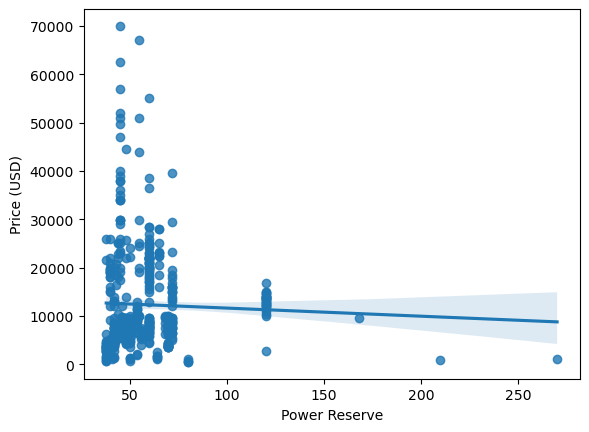

In [40]:
sns.regplot(x="Power Reserve", y="Price (USD)", data=LWatchData)
#in order to find the correlation between object type features and target variable we make use of plots
from scipy import stats
print("Power Reserve")
pearson_coef1, p_value1 = stats.pearsonr(LWatchData['Power Reserve'], LWatchData['Price (USD)'])
print("The pearson correlation coefficient is ",pearson_coef1," with a P_Value of P = ", p_value1)

In [41]:
#Drop featutures not contributing to the prediction of watch price

LWatchData.drop(['Model', 'Water Resistance', 'Case Diameter (mm)', 'Band Width (mm)', 'Power Reserve'], axis = 1, inplace = True)

In [42]:
#Check the data frame strucmture
LWatchData.shape

(492, 9)

In [43]:
#Rename Columns to be used for data type transformation
LWatchData.rename(columns = {'Case Material':'Case_Material', 'Strap Material':'Strap_Material', 'Movement Type':'Movement_Type',
                            'Case Thickness (mm)':'Case_Thickness', 'Dial Color':'Dial_Color', 'Crystal Material':'Crystal_Material',
                            'Price (USD)':'Price_USD'}, inplace = True)

In [44]:
#Build Machine learning algorithm (Machine Learning Model)
#Transform categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

lblENC = LabelEncoder()
LWatchData.Brand = lblENC.fit_transform(LWatchData.Brand)
LWatchData.Case_Material = lblENC.fit_transform(LWatchData.Case_Material)
LWatchData.Strap_Material = lblENC.fit_transform(LWatchData.Strap_Material)
LWatchData.Movement_Type = lblENC.fit_transform(LWatchData.Movement_Type)
LWatchData.Dial_Color = lblENC.fit_transform(LWatchData.Dial_Color)
LWatchData.Crystal_Material = lblENC.fit_transform(LWatchData.Crystal_Material)
LWatchData.Complications = lblENC.fit_transform(LWatchData.Complications)

In [45]:
#Checking transformed data
LWatchData.head(10)

,Brand,Case_Material,Strap_Material,Movement_Type,Case_Thickness,Dial_Color,Crystal_Material,Complications,Price_USD
0,27,12,11,0,13.00,0,3,3,9500
1,22,13,9,0,14.47,1,3,3,5800
2,31,12,5,0,13.00,6,3,0,4200
3,7,12,11,0,14.25,0,3,0,7900
5,18,12,5,2,9.20,0,3,25,5500
6,28,12,9,0,12.90,0,3,3,1400
7,11,12,11,1,13.00,0,2,0,1200
8,32,12,5,0,9.75,6,3,3,650
9,15,12,5,0,9.80,0,3,25,495
10,20,12,5,0,9.70,5,3,3,1150


In [46]:
#Calculate the Z-score method
import scipy.stats as stats
LWatchData = stats.zscore(LWatchData)

In [47]:
LWatchData

,Brand,Case_Material,Strap_Material,Movement_Type,Case_Thickness,Dial_Color,Crystal_Material,Complications,Price_USD
0,0.779142,0.224537,1.157428,-0.338224,0.548836,-0.804379,0.184521,-0.572326,-0.269685
1,0.310284,0.681034,0.499099,-0.338224,1.155722,-0.359211,0.184521,-0.572326,-0.623835
2,1.154228,0.224537,-0.817559,-0.338224,0.548836,1.866631,0.184521,-0.881760,-0.776981
3,-1.096288,0.224537,1.157428,-0.338224,1.064895,-0.804379,0.184521,-0.881760,-0.422831
5,-0.064801,0.224537,-0.817559,2.989901,-1.019986,-0.804379,0.184521,1.696854,-0.652550
...,...,...,...,...,...,...,...,...,...
502,-1.190059,-3.427436,-0.817559,-0.338224,-1.412191,1.866631,0.184521,-0.572326,0.878911
503,-1.283830,0.224537,-1.805053,-0.338224,1.580955,-0.804379,0.184521,-0.572326,0.113181
504,0.122742,0.224537,-0.817559,-0.338224,-0.813562,-0.359211,0.184521,-0.572326,-1.006700
505,1.529314,0.224537,1.157428,-0.338224,-0.276860,-0.359211,0.184521,-0.572326,0.639620


In [48]:
#all features from 0 to 8 columns
x_Wdata=LWatchData.iloc[:,0:7]
#Target variable column 9
y_Wdata=LWatchData.iloc[:,8]

In [49]:
x_Wdata.head()

,Brand,Case_Material,Strap_Material,Movement_Type,Case_Thickness,Dial_Color,Crystal_Material
0,0.779142,0.224537,1.157428,-0.338224,0.548836,-0.804379,0.184521
1,0.310284,0.681034,0.499099,-0.338224,1.155722,-0.359211,0.184521
2,1.154228,0.224537,-0.817559,-0.338224,0.548836,1.866631,0.184521
3,-1.096288,0.224537,1.157428,-0.338224,1.064895,-0.804379,0.184521
5,-0.064801,0.224537,-0.817559,2.989901,-1.019986,-0.804379,0.184521


In [50]:
y_Wdata.head()

0   -0.269685
1   -0.623835
2   -0.776981
3   -0.422831
5   -0.652550
Name: Price_USD, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split

#Split Train and test
X_train, X_test, Y_train, Y_test = train_test_split(x_Wdata,y_Wdata,test_size=0.3, random_state = 0)

In [93]:
from sklearn.linear_model import LinearRegression,Lasso
model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

In [94]:
Y_pred_MLR = model_mlr.predict(X_test)

In [95]:
#Using Multiple Linear Regression Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The Mean square error for MLR Price Predicted Value is : ', mse_MLR)

The Mean square error for MLR Price Predicted Value is :  0.9579204433604576


In [96]:
#Using Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

In [97]:
Y_pred_RF = model_rf.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The Mean square error for RF Price Predicted Value is : ', mse_RF)

The Mean square error for RF Price Predicted Value is :  0.3160100944983116


In [99]:
#Using Lasso Regression Model
from sklearn.linear_model import Lasso
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

In [100]:
Y_pred_lasso = model_lm.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_Lasso = mean_squared_error(Y_test, Y_pred_lasso)
print('The Mean square error for Lasso Price Predicted Value is : ', mse_Lasso)

The Mean square error for Lasso Price Predicted Value is :  1.3476953699701566


In [119]:
Scores = [('MLR', mse_MLR),('Random Forest', mse_RF),('Lasso', mse_Lasso)]

In [120]:
ViewScore = pds.DataFrame(data = Scores, columns=['Model','MAE Score'])
ViewScore

,Model,MAE Score
0,MLR,0.957920
1,Random Forest,0.316010
2,Lasso,1.347695


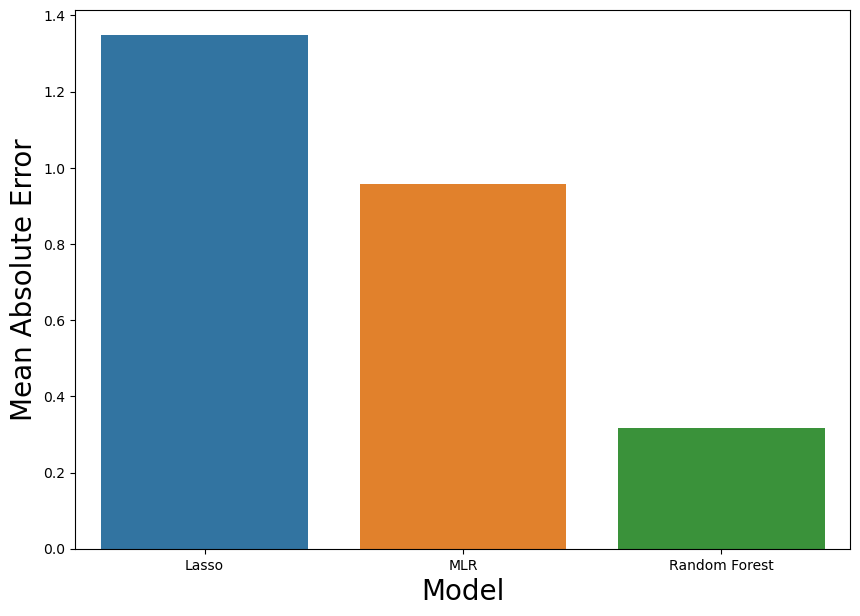

In [121]:
#View the error rates in different model to determine which is the best to use
ViewScore.sort_values(by=(['MAE Score']),ascending=False, inplace = True )

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x=ViewScore['Model'], y=ViewScore['MAE Score'],ax = axe)
axe.set_xlabel('Model',size=20)
axe.set_ylabel('Mean Absolute Error',size=20)
plt.show()

In [55]:
LWatchData

,Brand,Case_Material,Strap_Material,Movement_Type,Case_Thickness,Dial_Color,Crystal_Material,Complications,Price_USD
0,0.779142,0.224537,1.157428,-0.338224,0.548836,-0.804379,0.184521,-0.572326,-0.269685
1,0.310284,0.681034,0.499099,-0.338224,1.155722,-0.359211,0.184521,-0.572326,-0.623835
2,1.154228,0.224537,-0.817559,-0.338224,0.548836,1.866631,0.184521,-0.881760,-0.776981
3,-1.096288,0.224537,1.157428,-0.338224,1.064895,-0.804379,0.184521,-0.881760,-0.422831
5,-0.064801,0.224537,-0.817559,2.989901,-1.019986,-0.804379,0.184521,1.696854,-0.652550
...,...,...,...,...,...,...,...,...,...
502,-1.190059,-3.427436,-0.817559,-0.338224,-1.412191,1.866631,0.184521,-0.572326,0.878911
503,-1.283830,0.224537,-1.805053,-0.338224,1.580955,-0.804379,0.184521,-0.572326,0.113181
504,0.122742,0.224537,-0.817559,-0.338224,-0.813562,-0.359211,0.184521,-0.572326,-1.006700
505,1.529314,0.224537,1.157428,-0.338224,-0.276860,-0.359211,0.184521,-0.572326,0.639620
